# IMDB 리뷰 데이터 셋

- 유명한 인터넷 영화 데이터 베이스인 imdb.com 에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 말뭉치

## 자연어 처리(natural alnguage processing , NLP)

- 컴퓨터를 사용해 인간의 언어를 처리하는 분야

- 세부 분야
    - 음성 인식
    - 기계 번역
    - 감성 분석

- 자연어 처리 분야에서는 훈련 데이터를 말뭉치(corpus)라고 부름

## 임베딩

- 사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자의 나열인 벡터로 바꾼 결과 혹은 그 전체

- 컴퓨터에서 처리하는 모든 것은 숫자로 이루어진 데이터
    - 따라서 텍스트 그 자체를 신경망에 전달하지 않음
 
    - 합성곱 신경망에서 이미지를 다룰 때는 이미지가 정수 픽셀값으로 이루어져 있어서 특별히 변환을 하지 않음
 
- 텍스트 임베딩의 가장 쉬운 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것

    - 예)
        - he : 10
        - is : 11
        - a : 12
        - man : 13
          
    - 단어에 매핑되는 정수는 단어의 의미나 크기와 관련이 없음
        - He 를 10 으로 매핑하고 man 으 13으로 매핑하더라도 좋거나 크다의 의미 아님!
     
    - 정수 중 몇 가지는 특정한 용도로 예약되어 있는 경우가 많음
         
        - 예) 0 : 패딩(크기를맞춰줌의미없음), 1: 문장의 시작(<SOS>), 2: 어휘 사전에 없는 토큰
                - 예시라서 값이 달라질 수 있음
              
                - 어휘 사전 : 훈련 세트에서 고유한 단어를 뽑아 만든 목록, 입력값으로 들어왔던 단어들
                - 어휘 사전에 없는 토큰 <UNK> 엉크라고 읽는 교수님...?ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
                - 학습할때 없다고 에러 띄우면 안되니깐~~~~
     
            - ChatGpt : 다음단어맞추기! ex) 점심 메뉴 추천해줘<eos> =>
            - 답 : 추천해줘 <sos>라는 것 뒤에 나올만한 문장을 예측, 추론해서 답변을 한다~~~~
 
- 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 고백을 기준으로 분리
    - 이렇게 분리된 단어를 **토큰**이라고 부름
        - 하나의 샘플을 여러 개의 토큰으로 이루어져 있고 이 때 하나의 토큰이 하나의 타임스텝에 해당
     
    - 영어 말뭉치에서 토큰은 단어와 같이 취급하는 경우가 많음
        - **한국어**는 조사가 발달되어 있어 공백으로 나누는 것만으로는 부족함
        - 그래서 한국어는 **형태소 분석을 통해서 토큰을 분리!**
            - 한국어 자연어 처리하는 전문가는 고인물이 많다! 영어도 잘알고 국어도 잘하고~~
            - 강사님은 그것을 해냈다!

# 원핫인코딩을 활용한 RNN 텍스트 분류

## 데이터 준비

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words = 500)

- num_words : 단어 빈도가 많은 순서로 num_words 만큼 보존

In [3]:
# 훈련 세트, 테스트 세트의 크기 확인
print(x_train.shape, x_test.shape)

(25000,) (25000,)


In [4]:
# 차원 어디갔어!!!!!!!
# 리뷰의 길이 출력
print(len(x_train[0]), len(x_train[1]))

218 189


In [5]:
# 하나의 데이터는 리스트다~~~~~~~
type(x_train[0])

list

- 각각 25000개의 샘플로 이루어져있음

- 텍스트 길이가 제각각임

- 고정 크기의 2차원 배열에 담는 것보다 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적을로 사용할 수 있음

In [6]:
# 첫 번째 리뷰 출력
print(x_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
# 타깃 데이터 
# 0: 부정, 1 : 긍정
print(y_train[:10])

[1 0 0 1 0 0 1 0 1 0]


In [8]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size = 0.2, 
    stratify = y_train, random_state =34
)

### 각 리뷰의 길이 확인

- 각 리뷰의 길이를 넘파이 배열로 담아 평균 리뷰 길이, 길이 최솟값 , 길이 최댓값을 확인

In [9]:
lengths = np.array([len(x) for x in x_train])

In [10]:
print(np.mean(lengths), np.median(lengths), np.min(lengths), np.max(lengths))

238.8473 178.0 11 1854


- 차이가 많이나서 길이를 맞춰버리면 메모리 누수가 마이난다~~~

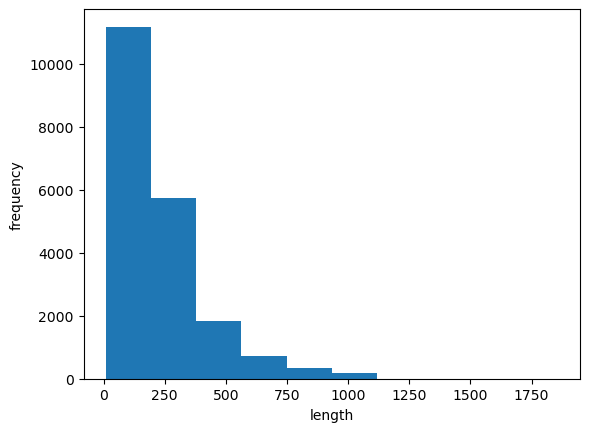

In [11]:
plt.figure()

plt.hist(lengths)

plt.xlabel("length")
plt.ylabel("frequency")

plt.show()

## 강사님 쭈쩐 : 200- 250 사이의 길이 중앙값과 평균값을 참고해서 길이를 설정한다
- 근데 오래걸림

- 평균이 중간값보다 높은 이유는 아주 큰 데이터가 있기 때문

- 대부분의 리뷰는 짧기 때문에 이번 예제에서는 리뷰의 길이를 100에 맞춰서 사용

    - 100보다 짧은 리뷰는 길이를 100에 맞추기 위해 **패딩 필요**

        - 패딩을 나타내는 토큰으로 는 0을 사용

In [12]:
# x_train의 길이를 100으로 맞추기 
train_seq = pad_sequences(x_train, maxlen = 100)

- maxlen 에 원하는 길이를 지정하면 그것보다 긴 경우는 잘라내고 짧은 겨웅는 0으로 패딩

In [13]:
# train_seq 크기 확인
train_seq.shape

(20000, 100)

In [14]:
# 그리스로마신화에 프로크루스테스 도적이고 연쇄살인범 과 같은게 pad_sequences 이다~

In [15]:
print(train_seq[0])

[  2   2   2   2   2   2   4   2   7 363   2   4   2  80  30 160   2  33
 118   2  22   8   2  56  23   6   2  17   4   2   2  18   2  22 231  18
 316 334   4 302  80   2  39   2   8   6   2   2   8  30 149 142 334   5
   6   2 101   2   8 123  14   8   2   2  80 485  24   8   2  21   8   2
  13 202  14 107 381  31  18   4  31 136  15 122  24  28  72   2  61   2
   5 160  18   2   2   2  23   6 364 352]


In [16]:
print(x_train[0][-100:]) # 뒤에서 자르는구나 ~

[2, 2, 2, 2, 2, 2, 4, 2, 7, 363, 2, 4, 2, 80, 30, 160, 2, 33, 118, 2, 22, 8, 2, 56, 23, 6, 2, 17, 4, 2, 2, 18, 2, 22, 231, 18, 316, 334, 4, 302, 80, 2, 39, 2, 8, 6, 2, 2, 8, 30, 149, 142, 334, 5, 6, 2, 101, 2, 8, 123, 14, 8, 2, 2, 80, 485, 24, 8, 2, 21, 8, 2, 13, 202, 14, 107, 381, 31, 18, 4, 31, 136, 15, 122, 24, 28, 72, 2, 61, 2, 5, 160, 18, 2, 2, 2, 23, 6, 364, 352]


- pad_sequences() 함수는 기본적으로 maxlen 보다 긴 시퀀스의 앞부분을 잘라냄
    - 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하기 때문에
        - 리뷰 끝에 결정적인 소감을 말할 가능성이 높음
          
    - 시퀀스의 **앞부분**을 잘라내고 싶다면
        - truncating 매개별수 값을 "post"로 변경
            - 기본값은 "pre"

In [17]:
train_seq[12]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   4,   2, 488,
         2,   2, 212,   7,   4, 172, 425,  16,   2,   2,  18,  45,   2,
         2, 318, 302,  21,   2,   8,  51,   2,   2,   2,   2,  56,  18,
        14, 189, 212,   2,   2, 330,   2,   4, 455,   2, 186,   8,  30,
        93,  46,   7,   2,   5,  27,   2, 168,  40,   2,   2,   2,  63,
        36, 242,  71,   4, 177,   2,  12,  23,   2,  11,  14,   2,   7,
         2,   7,  85,  76, 433, 102,   5,   2,   2,  17,   4,   2,   2,
         9,   2,   2,  11,   6, 392,  21,   2, 217], dtype=int32)

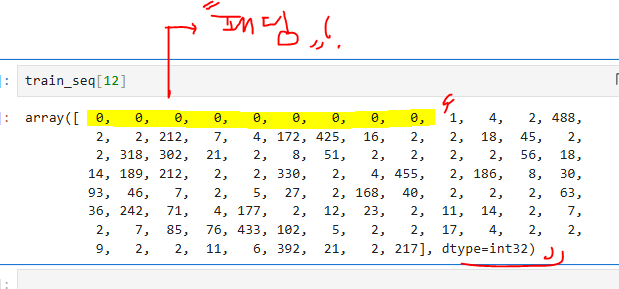

- 의미 없는 부분을 앞에 슥~ 넣어준다

- 패딩 토큰은 시퀀스의 앞부분에 추가됨
    - 시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미치게 되기 때문에
 
    - 뒷부분에 패딩을 추가하고 싶다면
        - padding 매개변수의 값을 "post"로 수정
            - 기본값은 "pre"
            - 다들 힘내 ~ 좋아 => 아 조~ 나 힘들다

In [18]:
# 검증 세트의 길이를 100으로 맞추기
val_seq = pad_sequences(x_val, maxlen = 100)

In [19]:
# 케라스에서 제공하는 원핫 인코딩을 위한 함수 
train_oh= keras.utils.to_categorical(train_seq)

In [20]:
train_oh.shape # 100개의 길이의 500종류의단어가 있는것이 20000개~~

(20000, 100, 500)

- 원핫인코딩을 사용하는 이유
    - 토큰을 정수로 변환한 데이터르르 그대로 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만듦
    - 정수 사이에는 어떤 관련도 없고 20번 토큰이 10번 토큰보다 중요한 것이 아님

In [21]:
train_oh[0,0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
print(np.sum(train_oh[0,0]))

1.0


- 하나의 원소만 1이고 나머지 원소는 모두 0임

In [23]:
# val_seq 원핫 인코딩
val_oh= keras.utils.to_categorical(val_seq)

## 모델 구성

- 케라스의 SimpleRNN 클래스 사용

- 이진 분류
    - 출력층은 1개의 유닛을 가지고 시그모이드 출력층 함수를 사용

In [24]:
# adam = keras.optimizers.Adam(learning_rate = 1e-4)
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model = keras.Sequential()
model.add(keras.Input(shape = (100, 500)))
model.add(keras.layers.SimpleRNN(8)) # 유닛의 개수 8
model.add(keras.layers.Dense(1, activation = "sigmoid")) # 예측할그야

- 입력층
    - 입력 차원의 첫 번째 차원은 샘플의 길이
    - 입력 차원의 두 번째 차원은 고유한 단어 수 (num_words)
        - load_data() 함수에서 500개의 단어만 사용하도록 지정했기 때문에 이번 예제에 고유한 단어 수는 500
     
- SimpleRNN
    - 첫 번째 매개변수는 사용할 유닛의 개수
 
    - activation
        - 기본값은 "tanh"
            - 하이퍼볼릭 탄젠트

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           4,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

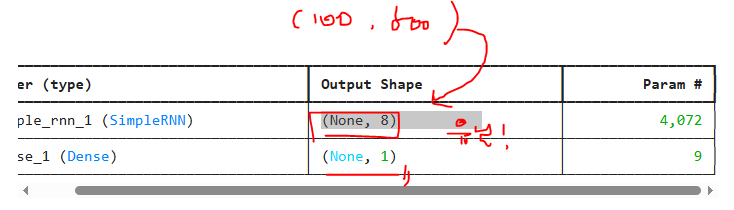

- 파라미터 개수
    - 입력 토큰은 500차원의 원핫 인코딩 배열
    -  배열이 순환층 유닛 8개와 완전연결
        - 500 * 8 = 4000
  
    -  순환층의 은닉상태는 다시 다음 타임스텝에 사용하기 위해 또 다른 가중치와 곱해짐
        -  은닉상태의 크기 * 유닛 수
            -  8 * 8 = 64
         
    -  각 유닛마다 하나의 절편
        - 8
     
    - (500 * 8) + (8 * 8) + 8 = 4,072 


## 모델 훈련

In [26]:
# optimizer 를 adam 에서 rmsprop 으로 바꿨다
model.compile(optimizer=rmsprop, loss = "binary_crossentropy", metrics=["accuracy"])
cp_cb = keras.callbacks.ModelCheckpoint("./model/best-simplernn-model.keras", save_best_only = True)

es_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights=True)

In [27]:
history = model.fit(train_oh, y_train, epochs=100, batch_size=64, validation_data=(val_oh, y_val), callbacks=[cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5441 - loss: 0.6873 - val_accuracy: 0.5772 - val_loss: 0.6791
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6069 - loss: 0.6676 - val_accuracy: 0.6198 - val_loss: 0.6617
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6436 - loss: 0.6504 - val_accuracy: 0.6572 - val_loss: 0.6453
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6740 - loss: 0.6338 - val_accuracy: 0.6816 - val_loss: 0.6292
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6959 - loss: 0.6174 - val_accuracy: 0.7022 - val_loss: 0.6140
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7131 - loss: 0.6016 - val_accuracy: 0.7136 - val_loss: 0.6000
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7283 - loss: 0.5861 - val_accuracy: 0.7182 - val_loss: 0.5883
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7408 - loss: 0.5716 -

# 시각화

- 과과과대적합~~~ => running rate 가 너무 커서 그렇다 조절하자!
- adam = keras.optimizers.Adam(1e-4)
- 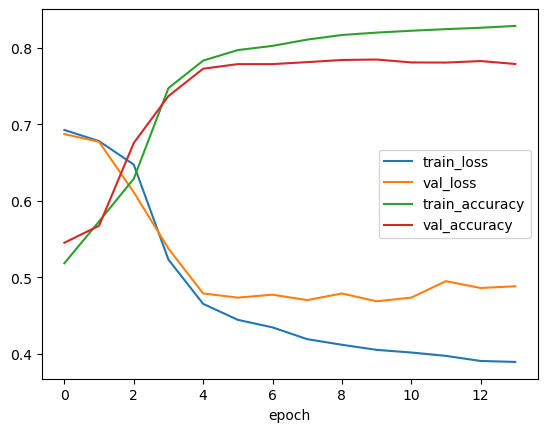

### 러닝 레이트 조절하고 다시 한것

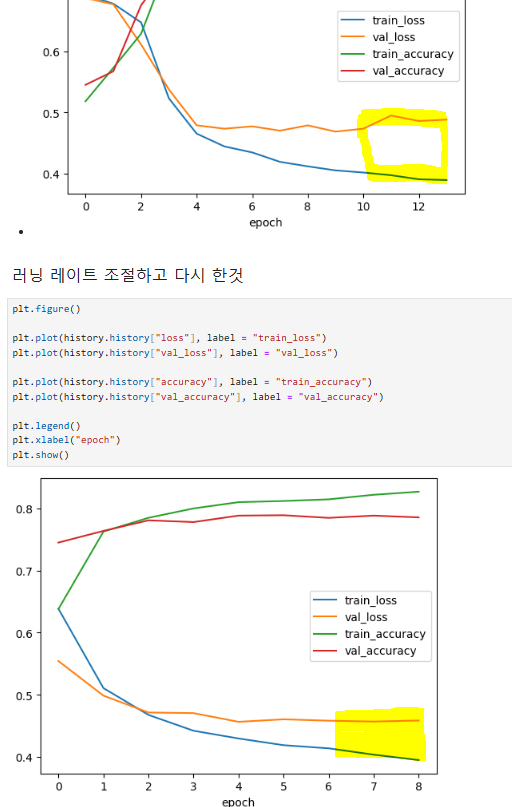

- 오오오오오오오ㅗㅗ오오오오오오오오ㅗ오오 우와~~
- 과대적합을 방지 하였다~?~?~?~??~?~??~??~?~??~?~??~?~??~?~??~??~

- adam 보다는 rmsprop 이 성능이 더 좋다 왜징?

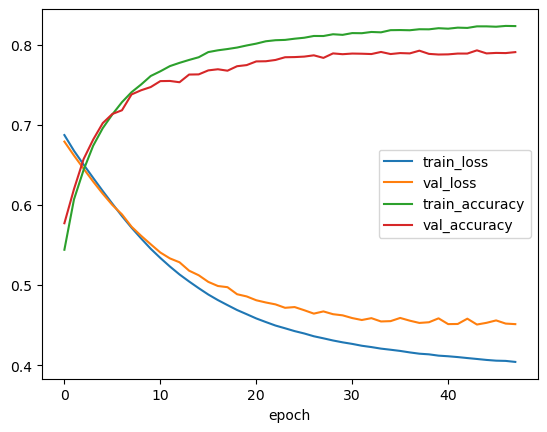

In [28]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.plot(history.history["accuracy"], label = "train_accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

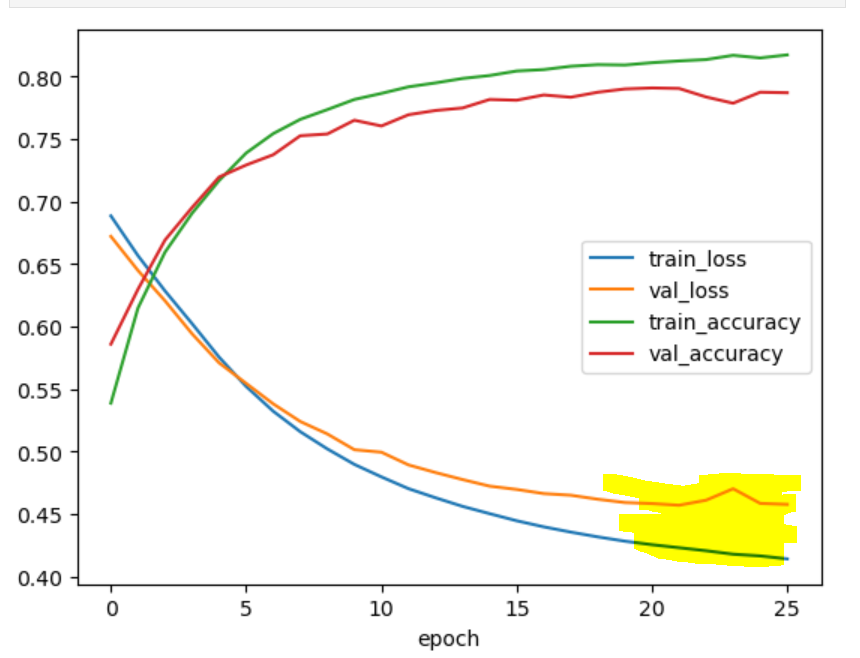

- 아름다워.,,,,.,,.

- 강사님은 잘 안되었음
- 왜냐! 원핫인코딩의 단점 때문임
- 입력 데이터가 매우 커진다~~~

In [29]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 8000000000


- 토큰 1개를 500차원으로 늘렸기 때문에 용량이 더 커짐
    - 훈련 데이터가 커질수록 문제가 더 심해짐

# 단어 임베딩을 활용한 RNN 텍스트 분류

<img src ="image/embedding.png">

- 단어 임베딩(word embedding)
    - 순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법
    - 각 단어를 고정된 크기의 실수 벡터로 변환
      
- 단어 임베딩으로 만들어진 벡터는 원핫 인코딩 벡터보다 훨씬 의미있는 값으로 채워져 있음
    - 자연어 처리에서 더 좋은 성능을내는 경우가 많음
      
    - 단어 임베딩 벡터를 만드는 층은 Embedding 클래스로 케라스에서 제공
        - 처음에는 모든 벡터가 랜덤하게 초기화 되고 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습
        - 어? 이친구가 그냥... 해준다고요????
        - **딥러닝은 끼워맞추기 => 맞으면서 언어를 배우는 우리들과 같다!**
          
- 단어 임베딩의 장점
    - 입력으로 정수 데이터를 받음
        - 원핫인코딩으로 변경된 배열이 아니라 train_seq 를 바로 사용할 수 있음
        - 메모리를 훨씬 효율적으로 사용할 수 있음
    - 원핫 인코딩 보다 훨씬 작은 크기로도 단어를 잘 표현 할 수 있음

In [30]:
model2 = keras.Sequential()
model2.add(keras.Input(shape= (100,))) # 샘플의 길이 100
model2.add(keras.layers.Embedding(500, 128)) 
# 500종류의 단어 
# 벡터의 크기 128개의 벡터는 기본 더 많게 하는경우가 많다
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

- Embedding
    - 첫 번째 매개변수는 어휘 사전의 크기
        - 앞에서 IMDB 데이터셋에서 500개의 단어만 사용하도록 서정했기 때문에 같은 값으로 설정
          
    - 두 번째 매개변수는 임베딩 벡터의 크기

In [31]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │          64,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 8)                   │           1,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,105 (254.32 KB)

 Trainable params: 65,105 (254.32 KB)

 Non-trainable params: 0 (0.00 B)

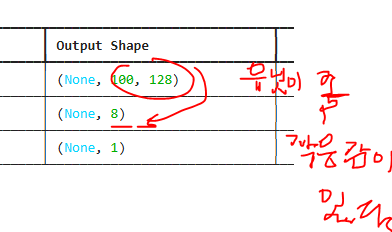

- 500개ㅡ이 각 토큰을 크기가 128인 벡터로 변경
- 500 * 128 = 64,000

- SimpleRNN
    - 임베딩 벡터의 크기가  128, 유닛의 개수 8
        - 128 * 8 = 1024
          
    - 은닉상태에 곱해지는 가중치
        - 8 * 8 = 64
          
    - 8개의 절편
 
    - 1024 + 64 + 8 = 1,096

In [ ]:
# optimizer 를 adam 에서 rmsprop 으로 바꿨다
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4) # 0과 가까운 숫자를 입력해서 최대한 적은 시간을 준다.
model2.compile(optimizer=rmsprop, loss = "binary_crossentropy", metrics=["accuracy"])
cp_cb = keras.callbacks.ModelCheckpoint("./model/best-Embedding-model.keras", save_best_only = True)
es_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights=True)

history2 = model2.fit(train_seq, y_train, epochs=100, batch_size=64, validation_data=(val_seq, y_val), callbacks=[cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5307 - loss: 0.6904 - val_accuracy: 0.6030 - val_loss: 0.6746
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6970 - loss: 0.6351 - val_accuracy: 0.7394 - val_loss: 0.6116
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7455 - loss: 0.5939 - val_accuracy: 0.7494 - val_loss: 0.5848
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7526 - loss: 0.5711 - val_accuracy: 0.7274 - val_loss: 0.5812
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7599 - loss: 0.5525 - val_accuracy: 0.7426 - val_loss: 0.5615
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7631 - loss: 0.5375 - val_accuracy: 0.7544 - val_loss: 0.5437
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7715 - loss: 0.5206 - val_accuracy: 0.7598 - val_loss: 0.5314
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7742 - loss: 0.5101 - 

In [ ]:
plt.figure()

plt.plot(history2.history["loss"], label = "train_loss")
plt.plot(history2.history["val_loss"], label = "val_loss")

plt.plot(history2.history["accuracy"], label = "train_accuracy")
plt.plot(history2.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 끔찍해졌습니다!

- 범주형 변수들에게 임베딩을 거는 경우도~~~~ 있다!
- 최신 gpt 친구에게는 embedding 친구는 읍다!
- 그 친구는 그 친구만의 방법이있는거죵...